# Phase-4-project
![Alt text](<timepic.png>)

## Moringa Phase 4 Project Submission

#### GROUP 4:

- Student name: Kenneth Karanja
- Student name: Pete Njagi
- Student name: James Koli
- Student name: Tom Mwabire
- Student name: Paul Mwangi
- Student name: Lee Ndung'u
- Student name: Edwin Mwenda

Scheduled project review date/time: April 12th 2024

# Data Science Jobs Anlysis Project
#### Important Project Files:

1. Group4.ipynb (Main Juypter document)
2. Presentation.pdf (Presentation)
3. Zillow_data.csv (Main Data)
4. Project Report Pdf

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
file_path = 'zillow_data.csv'
df = pd.read_csv(file_path)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [14]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [15]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [16]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [24]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [37]:

print(f'The number of duplicates within the dataset is : {df.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [19]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [20]:
df['Metro'].fillna('None', inplace=True)
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [ ]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

In [22]:
for column in df.iloc[:,7:]:
    if df[column].isna().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [23]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [25]:
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,217700,218600,218500,218100,216400,213100,209800,209200,209300,121.247357
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,208400,212200,215200,214300,213100,213700,218300,222700,225800,143.581446
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,122800,124600,126700,128800,130600,131700,132500,133000,133400,133.625219
14721,93733,81225,Mount Crested Butte,CO,None,Gunnison,14722,191100.0,192400.0,193700.0,...,671200,682400,695600,695500,694700,706400,705300,681500,664400,247.671376


In [39]:
df.loc[df['City'] == 'Aspen']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
7596,93816,81611,Aspen,CO,Glenwood Springs,Pitkin,7597,1443100.0,1453700.0,1464300.0,...,4119000,4161200,4193900,4244400,4321700,4381800,4469700,4626100,4766600,230.302820
14136,93846,81654,Aspen,CO,Glenwood Springs,Pitkin,14137,367500.0,369200.0,371000.0,...,943800,953000,953200,951500,950400,949300,962700,998200,1027400,179.564626


In [40]:
df.isna().sum()/len(df)*100

RegionID      0.0
RegionName    0.0
City          0.0
State         0.0
Metro         0.0
             ... 
2018-01       0.0
2018-02       0.0
2018-03       0.0
2018-04       0.0
ROI           0.0
Length: 273, dtype: float64

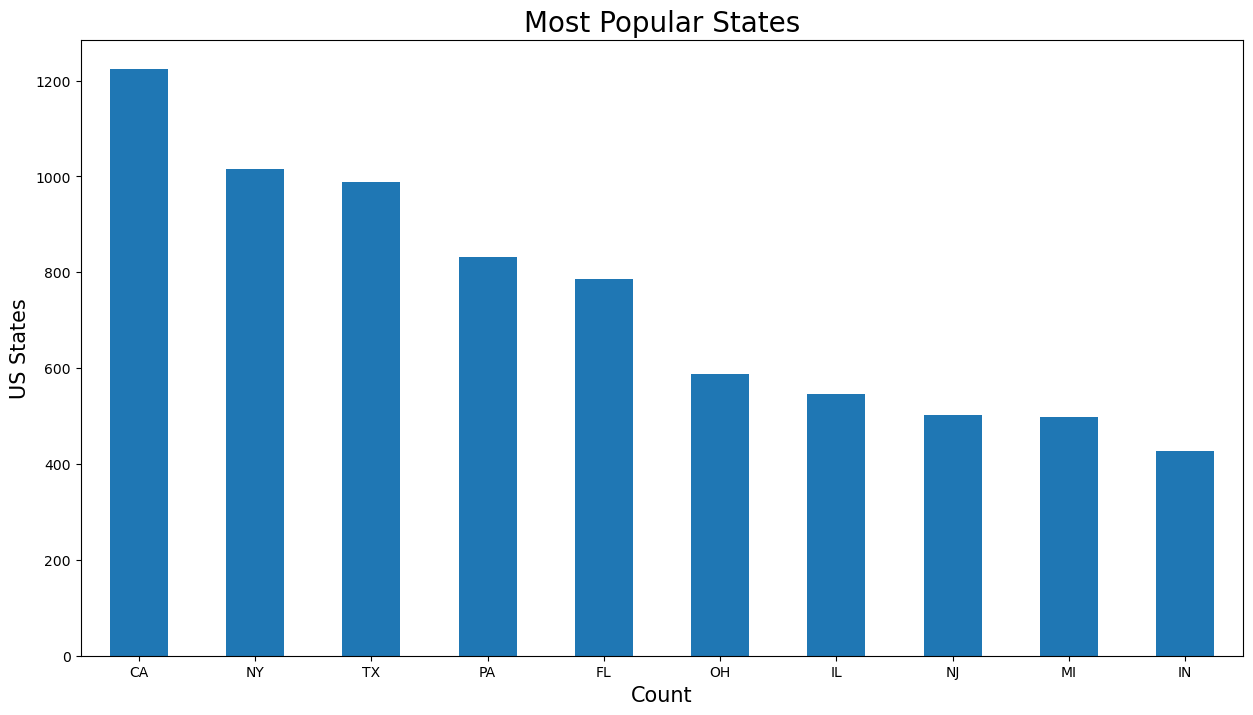

In [42]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
df.State.value_counts()[:10].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=20);

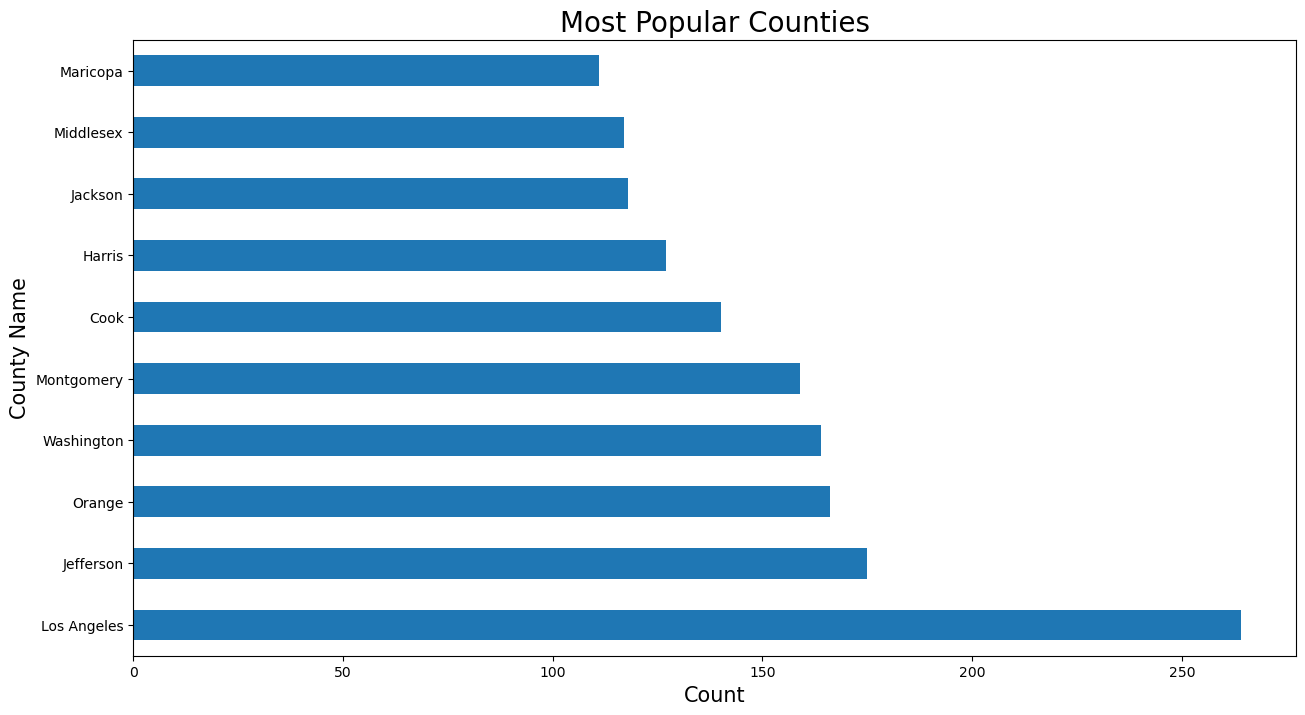

In [41]:
#Plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
df.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);


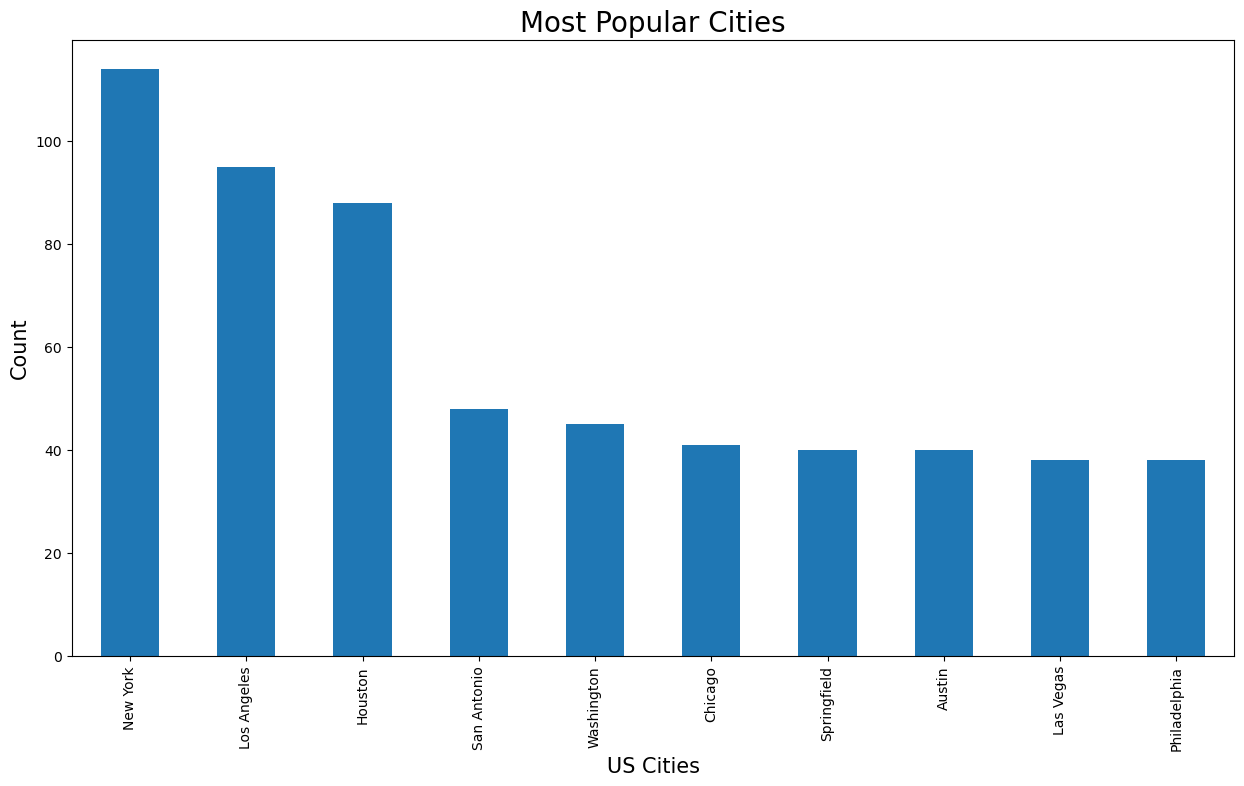

In [43]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
df.City.value_counts()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

In [46]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', 'ROI'],
      dtype='object', length=273)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


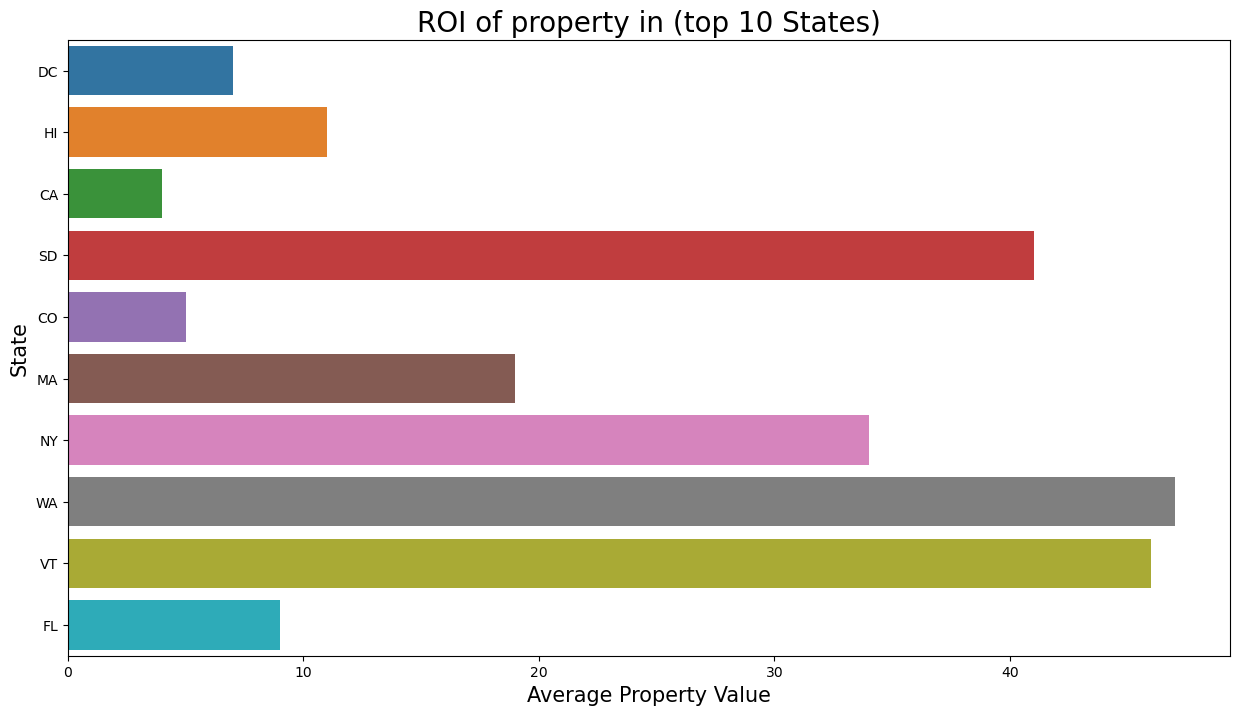

In [50]:
# Specify the numeric columns for aggregation
numeric_columns = ['ROI']

# Calculate the average profit margin for each city using numeric columns
df_avg_value = df.groupby('State')[numeric_columns].mean().reset_index()

# Sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('ROI', ascending=False)

# Select the top 10 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# Filter the DataFrame to include only t
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=top_states.index, y=top_states, ax=ax)

# set the title and axis labels
ax.set_title('ROI of property in (top 10 States)',fontsize=20)
ax.set_xlabel('Average Property Value',fontsize=15)
ax.set_ylabel('State',fontsize=15)

# display the plot
plt.show();

In [ ]:
plt.figure(figsize=(15,8))
df.ROI.nlargest()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

melted_data = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI'], var_name='time')
melted_data['time'] = pd.to_datetime(melted_data['time'], format='%Y-%m')
melted_data.groupby('time')
melted_data.head()

In [35]:
city_stats.isna().sum()

HousingPrice    5422
dtype: int64

In [38]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [32]:
#
"""missing_values = df.isnull().sum()
print(missing_values)"""

df.shape

(14723, 273)

In [ ]:
melted_data.isna().sum()

In [ ]:
melted_data.set_index('time', inplace=True)
melted_data.head()

In [ ]:
melted_data.describe

In [ ]:
melted_data['ROI'].nlargest(10)


In [ ]:
melted_data['State'].value_counts

In [ ]:
city_stats = df.groupby('City').agg({'1996-04':'mean', '1996-04':'median', '1996-04':'std'}).rename(columns={'1996-04': 'HousingPrice'})
city_stats = city_stats.sort_values(by='HousingPrice', ascending=False)

state_stats = df.groupby('State').agg({'1996-04':'mean', '1996-04':'median', '1996-04':'std'}).rename(columns={'1996-04': 'HousingPrice'})
state_stats = state_stats.sort_values(by='HousingPrice', ascending=False)

region_stats = df.groupby('RegionName').agg({'1996-04':'mean', '1996-04':'m